# Logistic Regression

Dataset: https://www.superdatascience.com/training/

Author: Filipa C. S. Rodrigues (filipacsrodrigues@gmail.com)

##### Simple Linear Regression:

\begin{align}
{y}= b_0 + b_1x_1 
\end{align}

##### Sigmoid Function

\begin{align}
p = \frac{1}{(1+e^{-y})}\\
<=> p(1 + e^{-y}) = 1\\
<=> 1 + e^{-y} = \frac{1}{p}\\
<=> e^{-y} = \frac{1-p}{p}\\
<=> ln(e^{-y}) = ln(\frac{1-p}{p})\\
<=> -yln(e) = ln(\frac{1-p}{p})\\
<=> y = -ln(\frac{1-p}{p})\\
<=> y = ln(\frac{p}{1-p})\\
\end{align}

Since,

\begin{align}
{y}= b_0 + b_1x_1 
\end{align}

and 

\begin{align}
y = ln(\frac{p}{1-p})
\end{align}

then,
##### Simple Logistic Regression
\begin{align}
ln(\frac{p}{1-p}) = b_0 + b_1x_1 
\end{align}

In [1]:
%matplotlib inline 
import pandas
import csv
import numpy as np
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as smdis
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pandas.DataFrame.from_csv('Email-Offer.csv', index_col=None)
df[:5]

,Age,Gender,TookAction
0,38,Female,0
1,32,Female,0
2,46,Male,1
3,34,Male,0
4,40,Male,0


#### Variables

- TookAction: dependent variable (y) -->  is binary
- Age: numeric independent variable (x)
- Gender: categorical independent variable (x)

In [3]:
df_y = df['TookAction']
df_x = df.drop(['TookAction'], axis = 1)

Create dummy variable for the categorical variable:

In [4]:
dummy = pandas.get_dummies(df_x['Gender'])
df_x = dummy.join(df_x)
df_x[:5]

,Female,Male,Age,Gender
0,1,0,38,Female
1,1,0,32,Female
2,0,1,46,Male
3,0,1,34,Male
4,0,1,40,Male


Only one dummy variable should be used to avoid the "dummy variable trap":

In [5]:
df_x = df_x.drop(['Gender', 'Male'], axis =1)
df_x[:5]

,Female,Age
0,1,38
1,1,32
2,0,46
3,0,34
4,0,40


Add a constant \begin{align} b_0 \end{align} to the model:

In [6]:
df_x = sm.add_constant(df_x)
df_x[:2]

,const,Female,Age
0,1,1,38
1,1,1,32


Create a model with all variables:

In [7]:
model1 = smdis.Logit(df_y, df_x).fit()
print model1.summary()

Optimization terminated successfully.
         Current function value: 0.148067
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             TookAction   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Dec 2016   Pseudo R-squ.:                  0.7800
Time:                        14:50:07   Log-Likelihood:                -14.807
converged:                       True   LL-Null:                       -67.301
                                        LLR p-value:                 1.592e-23
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -33.7146      8.833     -3.817      0.000       -51.027   -16.402
Female        -4.4374      1

__z = coef/std_err -> standardized coefficient (units of the std err of the underline variable)__

Let's see the effect of the variable "Age":

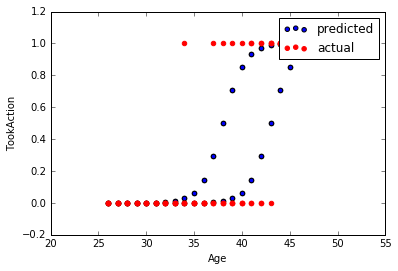

In [8]:
fig = plt.figure()
plt.scatter(df_x['Age'], model1.predict(), label = 'predicted')
plt.scatter(df_x['Age'], df_y, color='r', label = 'actual')
ax = fig.add_subplot(111)
ax.set_xlabel('Age')
ax.set_ylabel('TookAction')
ax.legend()


Now let's see the effect of the variable "Age":

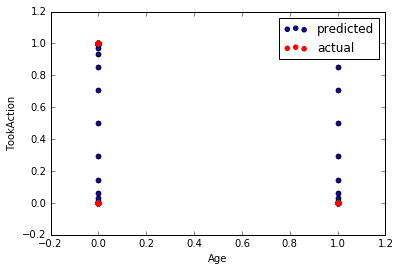

In [9]:
fig = plt.figure()
plt.scatter(df_x['Female'], model1.predict(), label = 'predicted')
plt.scatter(df_x['Female'], df_y, color='r', label = 'actual')
ax = fig.add_subplot(111)
ax.set_xlabel('Age')
ax.set_ylabel('TookAction')
ax.legend()


#### Logistic Regression Coefficients

1. The sign of the coefficients can be interpreted:
    - "+" contributes
    - "-" detracts
2. The coefficients magnitudes __cannot__ be used to quantify associations between the dependent and independent variables directly.
3. The coefficients magnitudes can be compared to contrast the level of per-unit association of different independent and dependent variables.
4. The Z-statistic can be used to constrast the level of association of different independent variables with dependent variables. Since the Z-statistic is standardized, there is no need to worry about the scale, however it is harder to interpret.